In [12]:
import pandas as pd
from numpy import array
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

df

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,26,35,25,22,35,26,17,27,35,28
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,782,811,871,813,770,803,820,804,749,759
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,496,580,513,515,511,551,512,489,477,493
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,27,28,32,25,25,29,29,34,29
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,146,159,141,165,165,148,169,161,163,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,632,647,697,621,687,618,652,642,663,580
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,764,734,726,762,789,771,808,714,765,720
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,279,256,285,224,257,304,263,247,284,267
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,0,0,0,1,5,2,1,0,2,3
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,612,641,611,620,616,603,571,622,568,603


In [13]:
"""
try:
    df.drop('MaxDailyPlays', axis=1, inplace=True)
except:
    print("No such column")
try:
    df.drop('MaxWeeklyPlays', axis=1, inplace=True)
except:
    print("No such column")

df.drop('Label', axis=1, inplace=True)
df
"""

'\ntry:\n    df.drop(\'MaxDailyPlays\', axis=1, inplace=True)\nexcept:\n    print("No such column")\ntry:\n    df.drop(\'MaxWeeklyPlays\', axis=1, inplace=True)\nexcept:\n    print("No such column")\n\ndf.drop(\'Label\', axis=1, inplace=True)\ndf\n'

In [14]:
# Define dataset with songs to test on
list_of_test_songs = ["Camila Cabello feat. Young Thug - Havana"]
df_test = df.loc[list_of_test_songs]
df_test

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,679,690,694,679,637,623,661,684,604,604


In [15]:
# Define dataset with songs to train on
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,1,2,3,4,5,6,7,8,9,10,...,171,172,173,174,175,176,177,178,179,180
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,26,35,25,22,35,26,17,27,35,28
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,782,811,871,813,770,803,820,804,749,759
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,496,580,513,515,511,551,512,489,477,493
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,27,28,32,25,25,29,29,34,29
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,146,159,141,165,165,148,169,161,163,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,632,647,697,621,687,618,652,642,663,580
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,764,734,726,762,789,771,808,714,765,720
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,279,256,285,224,257,304,263,247,284,267
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,0,0,0,1,5,2,1,0,2,3
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,612,641,611,620,616,603,571,622,568,603


In [16]:

# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56
number_of_total_days = 84
n_steps_out = number_of_total_days - n_steps_in

# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  56
Output days:  28
Example of first song input data:  [ 35  33  61  54 146 165 188 199 212 125 209 146 199 252 210 269 265 299
 304 226 236 239 289 259 207 229 292 231 267 281 272 221 254 168 180 211
 262 284 206 203 184 150 134 166 165 167 167 141 189 225 131 201 186 169
 159 265]
Example of first song output data:  [197 190 201 206 213 212 269 232 311 232 220 284 237 147  85  83  75 114
 104 103 247 262 307 255 304 252 255 227]


In [17]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, :n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])


Input days:  56
Output days:  28
Example of first song input data:  [ 74 117  99 143 123 128 126 147 126 153 179 178 250 223 246 241 233 265
 239 265 284 321 305 319 326 359 358 471 412 398 429 426 436 457 514 528
 494 556 583 545 585 593 646 654 610 623 607 595 594 633 651 633 670 676
 656 746]
Example of first song output data:  [807 799 864 817 861 764 901 801 897 921 855 888 785 845 826 919 874 902
 923 807 859 835 854 888 880 877 921 881]


[ 35  33  61 ... 676 656 746]


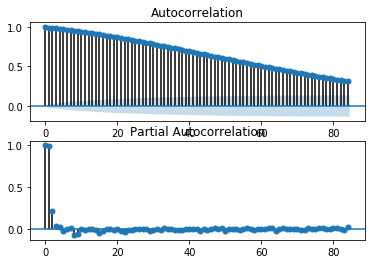

In [18]:
# acf and pacf plots of total power usage
from numpy import split
from numpy import array
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


# convert training data into a series
series = array(df_train).flatten()
series_test_input = array(test_input).flatten()
# Add test_input of the test song to train data
series = np.concatenate((series, series_test_input),axis=0)
print(series)

# plots
pyplot.figure()

lags = number_of_total_days
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

exog2 = [200 + random()]

# define the model
model = SARIMAX(series, order=(3, 1, 1), seasonal_order=(0, 0, 0, number_of_total_days),  
                enforce_stationarity=False, enforce_invertibility=False)

# fit the model
model_fit = model.fit(disp=False)

# make forecast
yhat = model_fit.predict(len(series), len(series)+n_steps_out-1, exog=[exog2])

yhat

/Users/clausholm/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1935: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)


array([726.13707792, 727.11368456, 725.35679531, 726.96108013,
       726.26981422, 726.52213547, 726.40445563, 726.46520867,
       726.43649325, 726.44941039, 726.44345337, 726.44626563,
       726.44494676, 726.44555917, 726.4452745 , 726.44540736,
       726.44534534, 726.44537424, 726.44536078, 726.44536705,
       726.44536413, 726.44536549, 726.44536486, 726.44536515,
       726.44536501, 726.44536508, 726.44536505, 726.44536506])

In [20]:
# Define expected and predicted
expected = test_output[0]
predictions = yhat
print("Expected time series output: ", expected)
print("Predicted time series output: ", predictions)

Expected time series output:  [807 799 864 817 861 764 901 801 897 921 855 888 785 845 826 919 874 902
 923 807 859 835 854 888 880 877 921 881]
Predicted time series output:  [726.13707792 727.11368456 725.35679531 726.96108013 726.26981422
 726.52213547 726.40445563 726.46520867 726.43649325 726.44941039
 726.44345337 726.44626563 726.44494676 726.44555917 726.4452745
 726.44540736 726.44534534 726.44537424 726.44536078 726.44536705
 726.44536413 726.44536549 726.44536486 726.44536515 726.44536501
 726.44536508 726.44536505 726.44536506]


In [21]:
# Create variable for each song, used to compare predicted and true value
lst = [expected, 
       predictions] 
  
# Make dataset of test song variables
df = pd.DataFrame(lst)
df = df.T
df.columns = ['True', 'Predicted']
df['Days'] = df.index + 1 + n_steps_in
df.set_index('Days',inplace=True)
df

,True,Predicted
Days,,
57,807.0,726.137078
58,799.0,727.113685
59,864.0,725.356795
60,817.0,726.961080
61,861.0,726.269814
62,764.0,726.522135
63,901.0,726.404456
64,801.0,726.465209
65,897.0,726.436493


<Figure size 432x288 with 0 Axes>

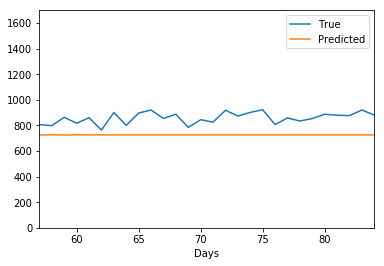

Song:  ['Camila Cabello feat. Young Thug - Havana']
Prediction from day 56 to day 84


In [22]:
# Define plotting of graphs and saving them to folder
import matplotlib.pyplot as plt 

plt.figure() 
df.plot()
plt.ylim((0,1700))
plt.show()

print("Song: ", list_of_test_songs)
print("Prediction from day", n_steps_in, "to day", number_of_total_days)

In [23]:
# Forecast Error (or Residual Forecast Error)
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [80.86292207923634, 71.88631543732834, 138.64320469239658, 90.0389198667466, 134.73018578409813, 37.47786452943626, 174.59554437237614, 74.53479132898565, 170.56350674595785, 194.55058960608392, 128.55654662919665, 161.5537343707923, 58.55505323562147, 118.5544408316922, 99.55472550322509, 192.55459264369495, 147.55465466045632, 175.55462575627746, 196.5546392238557, 80.55463294532251, 132.55463587290478, 108.55463450807338, 127.55463514429039, 161.5546348477003, 153.55463498597055, 150.55463492151, 194.5546349515604, 154.55463493755133]


In [24]:
# Mean Forecast Error (or Forecast Bias)
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)


Bias: 132.531020


In [25]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 132.531020


In [26]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 19503.415044


In [27]:
# Root Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 139.654628
